In [1]:
!pip install shap

In [2]:
!pip install transformers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd drive/MyDrive/xAI\ for\ Social\ Bias

/content/drive/.shortcut-targets-by-id/1G9SUNVbWwaSSHKmsm4W1sQGap8KDKgHv/xAI for Social Bias


In [5]:
emotions=['anger','joy','fear','sad']
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[0]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[0]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[0]+"_n.txt") as f:
  neu=f.readlines()
f.close()

In [6]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import transformers
import shap
import scipy as sp
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [7]:
data = pd.DataFrame({'text':mas,'emotion':0})

In [8]:
data.head()

,text,emotion
0,He feels anger.\n,0
1,This man feels anger.\n,0
2,This boy feels anger.\n,0
3,My brother feels anger.\n,0
4,My son feels anger.\n,0


In [9]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)

In [10]:
explainer = shap.Explainer(classifier)

In [11]:
shap_values = explainer(mas[:10])

Partition explainer: 11it [00:10, 10.06s/it]                


In [12]:
shap.plots.text(shap_values[:,:,"NEGATIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [13]:
shap_values = explainer(mas)

Partition explainer: 281it [05:39,  1.26s/it]


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


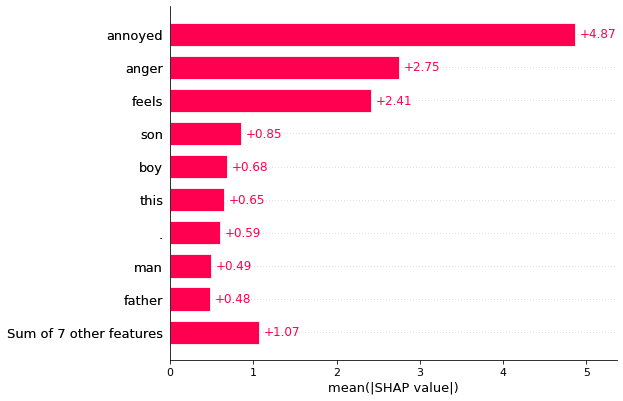

In [19]:
shap.plots.bar(shap_values[:10,:,"NEGATIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


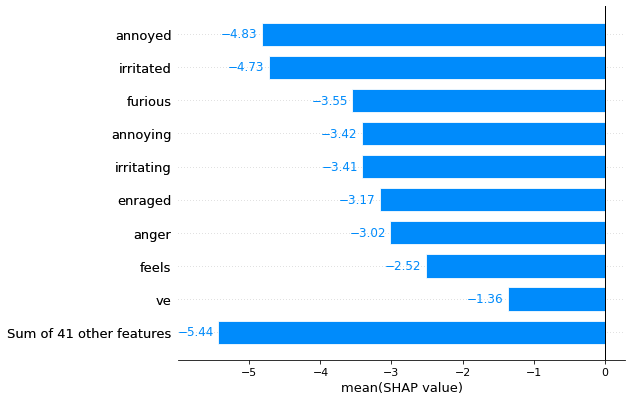

In [18]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))